### **Exercicio 5**

The Mean Absolute Error (MAE) results for the three models (across 10 different train-test splits) are as follows: Linear Regression MAE [8.23, 7.98, 8.06, 8.34, 8.23, 7.91, 7.94, 8.20, 8.08, 7.87], MLP Regressor with no activation function (identity) MAE [8.25, 7.99, 8.06, 8.35, 8.25, 7.91, 7.95, 8.18, 8.07, 7.91] and MLP Regressor with ReLU activation MAE [5.02, 4.66, 5.05, 5.04, 5.05, 4.73, 4.68, 4.91, 4.71, 4.81].

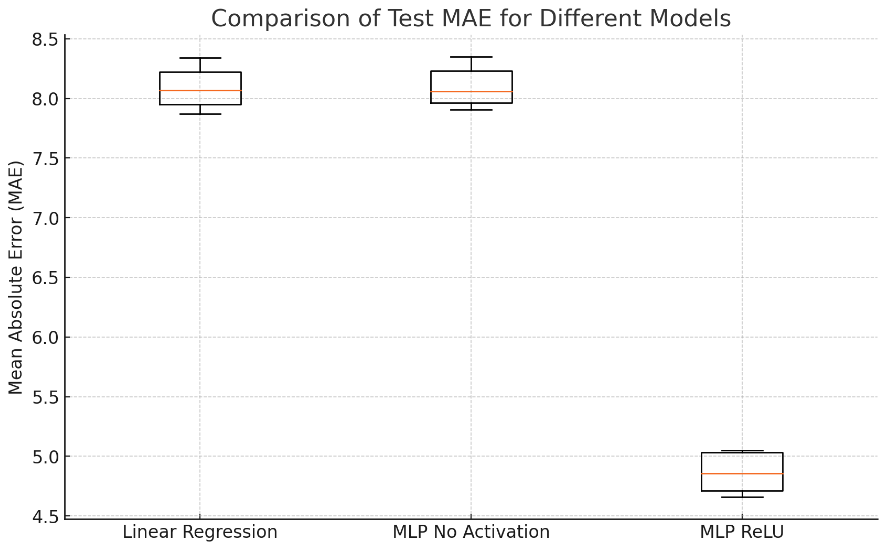

The boxplot shows a comparison of the Mean Absolute Error (MAE) across the three models. Both Linear Regression and the MLP with no activation function (identity) demonstrate very similar performance, with an MAE of around 8.0. In contrast, the MLP with ReLU activation significantly outperforms the other two models, achieving a much lower MAE, around 5.0. This suggests that the MLP with ReLU activation provides better results, likely because the non-linear ReLU activation allows the model to capture more complex relationships in the data.

### **Exercicio 6**


Linear Regression is a simple linear model where the relationship between inputs and the output is assumed to be linear. Each input feature is assigned a weight, and the output is the weighted sum of the inputs. An MLP without activation functions is essentially equivalent to multiple layers of linear transformations, as the identity activation function keeps each layer as a linear transformation. Since a composition of linear transformations remains linear, an MLP without activation functions is functionally similar to a linear model like Linear Regression.

In terms of performance, both the Linear Regression model and the MLP without activation functions perform almost identically, with Mean Absolute Error (MAE) values hovering around 8.0, as shown in the boxplots. This demonstrates that without activation functions, the MLP does not offer any advantage over Linear Regression, as both are constrained to modeling linear relationships.

Activation functions play a critical role in MLPs by introducing non-linearity, which is necessary for the network to capture complex patterns in data. Without activation functions, an MLP can only model linear relationships, as seen in the MLP without activations. In contrast, the MLP with ReLU activation significantly outperformed both Linear Regression and the MLP without activations in the experiment, achieving an MAE of around 5.0 compared to the others' 8.0. This highlights the importance of non-linear activation functions, with ReLU enabling the MLP to capture more complex, non-linear relationships, leading to better performance in predicting Parkinson's Disease scores.

In conclusion, the use of activation functions in MLPs is essential for capturing non-linear relationships in data, resulting in improved performance. Without activation functions, the MLP is reduced to a series of linear transformations, offering no benefit over a simple linear model like Linear Regression. This is evident from the boxplot comparison, where the MLP with ReLU activation outperforms both Linear Regression and the MLP without activations.

### **Exercicio 7**

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'alpha': 0.0001, 'batch_size': 32, 'learning_rate_init': 0.01}
Test MAE: 4.563311573351935


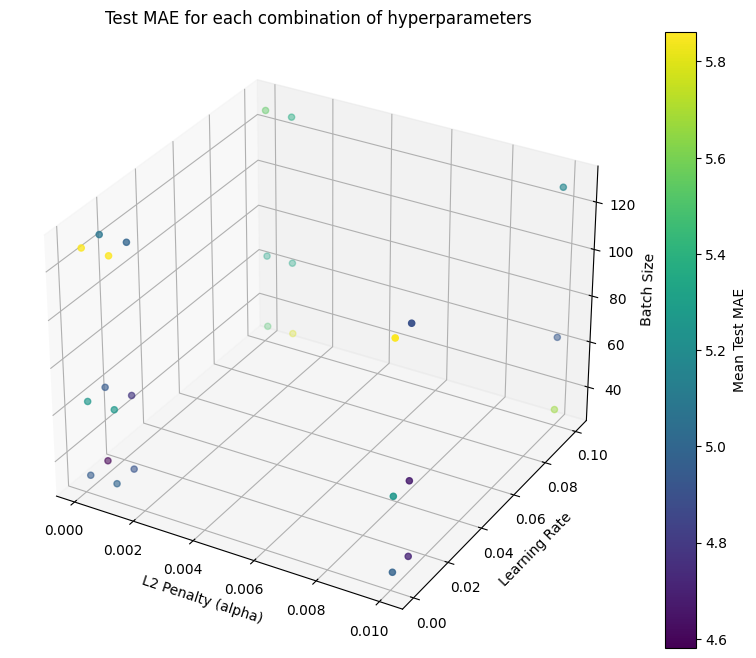

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('parkinsons.csv')


X = data.drop(columns=['target'])
y = data['target']


mlp = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0,)


param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty
    'learning_rate_init': [0.001, 0.01, 0.1],  # Learning rate
    'batch_size': [32, 64, 128]  # Batch size
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

grid_search = GridSearchCV(mlp, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
results = pd.DataFrame(grid_search.cv_results_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)

print(f"Best hyperparameters: {best_params}")
print(f"Test MAE: {test_mae}")

mean_test_scores = -results['mean_test_score']
alphas = results['param_alpha'].astype(float)
learning_rates = results['param_learning_rate_init'].astype(float)
batch_sizes = results['param_batch_size'].astype(float)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(alphas, learning_rates, batch_sizes, c=mean_test_scores, cmap='viridis')
ax.set_xlabel('L2 Penalty (alpha)')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('Batch Size')
ax.set_title('Test MAE for each combination of hyperparameters')

plt.colorbar(sc, ax=ax, label='Mean Test MAE')

plt.show()

The code you provided performs a Grid Search to optimize the hyperparameters of the MLPRegressor (L2 penalty, learning rate, and batch size) and generates a 3D plot showing the Mean Absolute Error (MAE) for each combination of hyperparameters.

The L2 penalty, controlled by the alpha parameter, helps prevent overfitting by penalizing large weights in the model. Lower values of alpha allow the model to fit the data better, while higher values impose stronger regularization. In the plot, you can observe how different values of alpha impact the MAE. The ideal alpha should balance model complexity and its ability to generalize. If the MAE is lower for smaller alpha values, this suggests that the model benefits from less regularization.

The learning_rate_init parameter defines how fast the model adjusts its weights during training. Very high learning rates can cause the model to overshoot local minima, while very low rates may result in slow convergence. If the MAE is lower with medium learning rates, it indicates good convergence. A common trade-off is that very high learning rates may lead to worse performance, while very low rates are more stable but slower to converge.

The batch size affects how often the model’s weights are updated during training. Smaller batch sizes lead to more frequent, noisier updates, while larger batch sizes result in smoother, less frequent updates. The 3D plot should show how batch size influences the combination of alpha and learning rate. If the MAE is lower with intermediate batch sizes, it suggests that these batch sizes strike a balance between frequent updates and reduced variability.

At the end of the Grid Search, the best hyperparameter combination is selected based on the lowest MAE, meaning that the optimized combination maximizes the model’s accuracy in predicting the score on the Unified Parkinson's Disease Rating Scale.

There are several trade-offs to consider. Very high L2 penalties can lead to underfitting, while very low penalties might allow the model to memorize the training data (overfitting). The goal is to find a balance. A high learning rate may reduce training time but can prevent the model from finding an optimal point, while low learning rates are safer but slower. Smaller batch sizes introduce more noise into the weight updates but allow for quicker convergence, whereas larger batch sizes provide stability but may slow down the process.

If the generated plot shows points with lower MAE values for intermediate levels of alpha, learning_rate_init, and batch_size, it indicates that a balance between moderate regularization, intermediate learning rates, and batch sizes leads to the best performance.